# Analyzing Census Income Data

The dataset in question can be found [here]("https://www.kaggle.com/uciml/adult-census-income").
The goal of this project is to perform different ML methods.

Here are the descriptions of the features:
* **age:** the age of an individual
* **workclass:** a general term to represent the employment status of an individual
* **fnlwgt:** final weight. (number of people the census believes the specific entry represents)
* **education:** highest level of education that the individual achieved
* **education.num:** education represented using numbers
* **marital.status:** marital status of an individual
* **occupation:** general type of occupation of an individual
* **relationship:** what is this individual relative to others (somewhat redundant with marital.status)
* **race:** Description of an individual's race
* **sex:** biological sex of an individual
* **capital.gain:** capital gain of an individual
* **capital.loss:** capital loss of an individual
* **hours.per.week:** reported hours of work per week of an individual
* **native.country:** country of origin of an individual
* **income:** categorical value describing wether an individual earnt more or less than 50K a year (our target variable)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)

#matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In this first look at our dataset, we can see that missing values have been marked using "?". We'll turn these into NaN:

In [4]:
data[data == "?"] = np.nan

In [5]:
data.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
15341,28,Private,354095,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
19076,50,Private,215990,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4935,41,Private,254440,Assoc-voc,11,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,60,United-States,<=50K
24060,34,Private,106541,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
10399,30,Private,345122,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see that variables with missing value are *workclass*, *occupation*, and *native.country*.
These are all categorical values, thus we will impute using the mode.

In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [8]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now that there are no missing values left, we can almost start the analysis of our data. Before we do, let's rename columns to appropriate syntax and do some basic maintenance work:

In [9]:
data["income"].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [10]:
map_dic = {"<=50K":0, '>50K':1}
data['income'] = data['income'].map(map_dic)
data["income"].sample(5)

6848     0
7113     0
20388    0
26290    0
6360     1
Name: income, dtype: int64

In [11]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [12]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']
data.columns = columns

In [13]:
num_feats = ['age', 'fnlwgt', 'education_num', 'capital_gain',
             'capital_loss', 'hours_per_week', 'income']
cat_feats = ['workclass', 'education', 'maritalstatus', 'occupation', 
             'relationship', 'race', 'sex', 'native_country', 'income']

In [14]:
# shuffle data:
#data = data.sample(frac=1).reset_index(drop=True)

In order for our later predictions and our visual analysis to be useful, we need to make sure that the target variable is equally distribiuted in our train and test sets:

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=17)

for train_index, test_index in split.split(data, data['income']):
    train = data.loc[train_index]
    test = data.loc[test_index]

#sns.countplot(train['income'])



In [16]:
train['income'].value_counts(normalize=True)

0    0.759175
1    0.240825
Name: income, dtype: float64

In [17]:
test['income'].value_counts(normalize=True)

0    0.759251
1    0.240749
Name: income, dtype: float64

Awesome, with stratified sampling, we were able to make sure, that the distribution of our target is the same in our train and test set. We can now start our analysis of our data to gain insights.

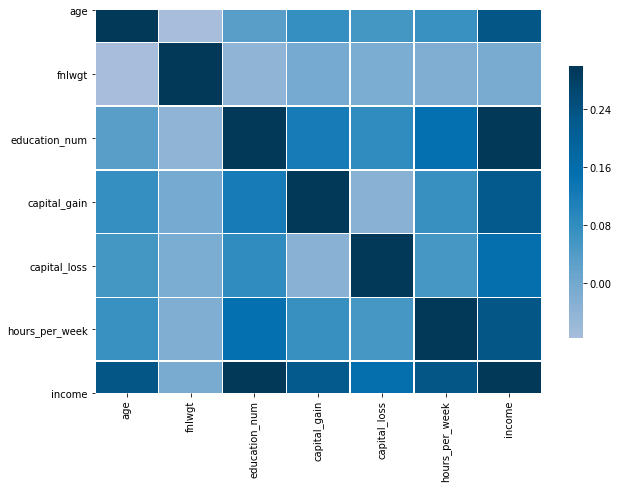

In [18]:
corr = train.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap="PuBu", vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
train.corr()['income'].sort_values()

fnlwgt           -0.006496
capital_loss      0.155521
capital_gain      0.223393
hours_per_week    0.231870
age               0.233507
education_num     0.332069
income            1.000000
Name: income, dtype: float64

In [20]:
# dealing with categorical variables:

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [21]:
import scipy.stats as ss
cramer_vs = {}
for var in cat_feats:
    wc_matrix = pd.crosstab(train[var], train['income']).as_matrix()
    cramer_vs[var] = cramers_v(wc_matrix)

In [22]:
cramer_vs

{'workclass': 0.17072187351341292,
 'education': 0.3647521962464127,
 'maritalstatus': 0.44813932657381644,
 'occupation': 0.3107549302623764,
 'relationship': 0.4538861778715313,
 'race': 0.10098961769418772,
 'sex': 0.2159359821760026,
 'native_country': 0.09438339578999588,
 'income': 0.9998950048393168}

We can see fairly strong correlations/association-score's for the following features:
* education_num/education
* capital_gain
* hours_per_week
* age
* marital_status/relationship
* occupation
* sex

When building our models, we'll remember this selection of features.

In [23]:
high_corr_feats = [
                   'education_num',
                   'capital_gain', 
                   'hours_per_week', 
                   'age', 
                   'relationship', 
                   'occupation', 
                   'sex'
                  ]


Let's look at some individual variables and some interesting distirbutions next:

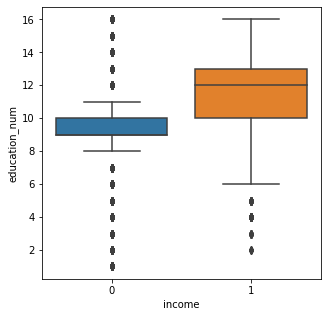

In [24]:
fig = plt.figure(figsize=(5, 5))
sns.boxplot(x='income', y='education_num', data=train)

We can clearly see, higher education; in most cases; results in higher income. <br>
But there are also cases with low income and high numbers of years of education.

In [25]:
high_in_low_ed = train[(train['income'] == 1) & (train['education_num'] < 6)]

In [26]:
low_in_high_ed = train[(train['income'] == 0) & (train['education_num'] > 15)]

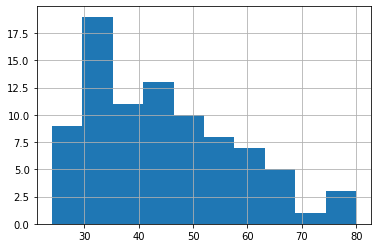

In [27]:
low_in_high_ed['age'].hist()

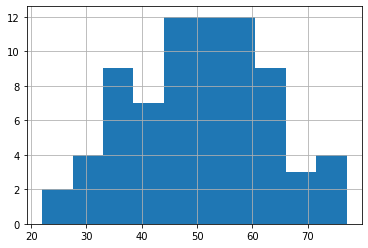

In [28]:
high_in_low_ed['age'].hist()

It seems, that having a high education leads to a higher income later in life.

## Machine Learning Exploration


In this next step, we'll try many different models and shortlist promising ones.
But before this, let's look at our features once again and figure out, what there is left to do in order to prepare our dataset for Machine Learning purposes:

In [29]:
train.head()

,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
9392,34,Private,204461,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,1
25105,32,Private,24961,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,0
13815,31,Private,124827,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,0
28821,43,Private,54611,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
29417,17,Private,147069,10th,6,Never-married,Sales,Own-child,White,Female,0,0,16,United-States,0


* We can drop education, since it is also represented in education_num
* We will drop workclass - oneHotEncoding would increase dimensionality too much for the projected accuracy gain
* We will encode "relationship" and "occupation" using OneHotEncoding
* We will make "sex" a binary feature (0, 1)
* We can drop native_country

In [30]:
map_dic = {"Male":0, 'Female':1}
train['sex'] = train['sex'].map(map_dic)
test['sex'] = test['sex'].map(map_dic)
train['sex'].sample(5)

9704     1
27272    1
29309    1
2200     1
2660     0
Name: sex, dtype: int64

In [31]:
train = train.join(pd.get_dummies(train['relationship']))
train = train.join(pd.get_dummies(train['occupation']))

In [32]:
train = train.drop(['relationship', 'occupation', 'maritalstatus',
                    'native_country', 'race', 'fnlwgt',
                    'education', 'workclass'], axis=1)

In [33]:
train.sample()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
6614,41,13,0,0,0,48,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
test = test.join(pd.get_dummies(test['relationship']))
test = test.join(pd.get_dummies(test['occupation']))

In [35]:
test = test.drop(['relationship', 'occupation', 'maritalstatus',
                    'native_country', 'race', 'fnlwgt',
                    'education', 'workclass'], axis=1)

In [36]:
test.sample()

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
28895,30,9,1,0,0,20,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


All this can be implemented in a pipeline. Let's explore what a Pipeline can do for us in this case.
First, we'll build custom transformers:

In [37]:
"""
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# transformer for dropping unneeded features:

class MyDropper(BaseEstimator, TransformerMixin):
    def __init__(self, feats_to_drop):
        self.feats_to_drop = feats_to_drop
    
    def drop_feats(self, df):
        for el in feats_to_drop:
            dat =
    
    def transform(self, x):
        dat = x.copy()
        for el in feats_to_drop:
            dat = dat.drop(el, axis=1)
        return dat
    def fit(self, dat, y=None):
        return self

# transformer for mapping:

class MyMapper(BaseEstimator, TransformerMixin):
    def __init__(self, mapper, col):
        self.mapper = mapper
        self.col = col
        
    def transform(self, x):
        
        x = x.map(self.mapper)
        dat = x.copy()
        return dat
    
    def fit(self, dat, y=None):
        return self
    

feats_to_drop = ['relationship', 'occupation', 'maritalstatus', 'native_country', 'race', 'fnlwgt']
mapper1 = {"Male":0, 'Female':1}
col1 = 'sex'
mapper2 = {"<=50K":0, '>50K':1}
col2 = 'income'
"""

'\nfrom sklearn.base import BaseEstimator, TransformerMixin\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline\n\n\n# transformer for dropping unneeded features:\n\nclass MyDropper(BaseEstimator, TransformerMixin):\n    def __init__(self, feats_to_drop):\n        self.feats_to_drop = feats_to_drop\n    \n    def drop_feats(self, df):\n        for el in feats_to_drop:\n            dat =\n    \n    def transform(self, x):\n        dat = x.copy()\n        for el in feats_to_drop:\n            dat = dat.drop(el, axis=1)\n        return dat\n    def fit(self, dat, y=None):\n        return self\n\n# transformer for mapping:\n\nclass MyMapper(BaseEstimator, TransformerMixin):\n    def __init__(self, mapper, col):\n        self.mapper = mapper\n        self.col = col\n        \n    def transform(self, x):\n        \n        x = x.map(self.mapper)\n        dat = x.copy()\n        return dat\n    \n    def fit(self, dat, y=None):\n        return self\n    \n

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# building the pipeline
steps = [
         ('scaler', StandardScaler()),
        ]

pipe = Pipeline(
    steps
)

### We can now start exploring different Machine Learning models:

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
X_train = train.drop(['income'], axis=1)
y_train = train['income']
X_test = test.drop(['income'], axis=1)
y_test = test['income']

In [43]:
X_train = pipe.fit_transform(X_train)
X_test = pipe.fit_transform(X_test)

In [45]:
X_train

array([[-0.33769773,  1.13526441, -0.702612  , ..., -0.35395028,
        -0.16992316, -0.2259271 ],
       [-0.48430845,  0.35703981, -0.702612  , ..., -0.35395028,
         5.88501308, -0.2259271 ],
       [-0.55761382, -0.42118478, -0.702612  , ..., -0.35395028,
        -0.16992316, -0.2259271 ],
       ...,
       [-1.29066745, -0.03207249, -0.702612  , ..., -0.35395028,
        -0.16992316, -0.2259271 ],
       [-0.11778164,  1.913489  , -0.702612  , ..., -0.35395028,
        -0.16992316, -0.2259271 ],
       [-0.26439236,  1.5243767 ,  1.42326063, ...,  2.82525556,
        -0.16992316, -0.2259271 ]])

In [46]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.8380744 , 0.85131867, 0.83863165])

In [48]:
# creating a "always poor" classifier

from sklearn.base import BaseEstimator

class Always1Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [49]:
always1clf = Always1Classifier()
cross_val_score(always1clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.76091213, 0.75699643, 0.7596176 ])

This shows, if we want to use only 'accuracy' as a measurement, we need to keep in mind, that a really stupid classifier can reach around 76% accuracy on this dataset. Let's explore other ways of measuring performance as well:

In [50]:
# confusion matrix:

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[18375,  1400],
       [ 2698,  3575]])

Findings: 16532 instances were correctly classified as 0, 3243 were wrongly classified as 0 <br>
4282 were correctly classified as 1, 1991 were wrongly classified as one.

#### Other useful metrics for classification tasks are precision and recall.
Precision describes the accuracy of the positive predictions (TP / (TP + FP)) <br>
Using precision alone can lead to false impressions about the classifier. It is often used together with: <br>
Recall, also called sensitivity, describes the true positive rate (the ratio of positive instances that are correctly detected by the classifier (TP / (TP + FN))).

In [52]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred)

0.7185929648241206

In [53]:
recall_score(y_train, y_train_pred)

0.5699027578511079

Now we have a better picture of this classifier. It detects 60% of low income individuals and when it predicts an individual has low income, it is correct 53% of the time. Not good at all.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

def evaluate_performance(clf):
    cvs = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    predictions = cross_val_predict(clf, X_train, y_train, cv=3) 
    conf_mat = confusion_matrix(y_train, predictions)
    prec_sc = precision_score(y_train, predictions)
    rec_sc = recall_score(y_train, predictions)
    typ = type(clf)
    print(f"These are the scores of {typ}. \n Cross_val_scores: {str(cvs)} \n Confusion Matrix: \n{conf_mat} \n Precision: {prec_sc} \n Recall: {rec_sc}")

In [55]:
evaluate_performance(sgd_clf)

These are the scores of <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>. 
 Cross_val_scores: [0.8380744  0.85131867 0.83863165] 
 Confusion Matrix: 
[[18375  1400]
 [ 2698  3575]] 
 Precision: 0.7185929648241206 
 Recall: 0.5699027578511079
